# Data Cleaning (Abby)

- X Dropping missing vals 
- X Converting fire/no fire to 0 and 1 
- X Converting columns to appropriate data types 
- X Converting region to 1 or 2? 
- XCreating test and training data sets

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

df = data.copy()
#dropping missing vals
df.dropna(inplace=True)

# dropping a row that was just for labelling
df = df.drop(index=123,axis=0)

# fixing index 
df.reset_index(inplace=True)

In [2]:
# Region 1 and 2
# Region 1 is Bejaia and Region 2 is Sidi Bel-Abbes 
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [3]:
# getting rid of column names weird spacing
df.columns=df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
#Converting Not fire/Fire (with unnecessary spacing) to 0 and 1
print(df['Classes'].unique())

['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


In [5]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [6]:
df['Classes'] = df['Classes'].replace('not fire', 0)
df['Classes'] = df['Classes'].replace('fire', 1)
df.Classes.unique()

array([0, 1])

In [7]:
# converting column data types
df['DC']=df['DC'].astype('float')
df['ISI']=df['ISI'].astype('float')
df['BUI']=df['BUI'].astype('float')
df['FWI']=df['FWI'].astype('float')
df['day']=df['day'].astype('int')
df['month']=df['month'].astype('int')
df['year']=df['year'].astype('int')
df['Temperature']=df['Temperature'].astype('int')
df['RH']=df['RH'].astype('int')
df['Ws']=df['Ws'].astype('int')
df['Rain']=df['Rain'].astype('float')
df['FFMC']=df['FFMC'].astype('float')
df['DMC']=df['DMC'].astype('float')
df

index  day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  \
0        0    1      6  2012           29  57  18   0.0  65.7   3.4   7.6   
1        1    2      6  2012           29  61  13   1.3  64.4   4.1   7.6   
2        2    3      6  2012           26  82  22  13.1  47.1   2.5   7.1   
3        3    4      6  2012           25  89  13   2.5  28.6   1.3   6.9   
4        4    5      6  2012           27  77  16   0.0  64.8   3.0  14.2   
..     ...  ...    ...   ...          ...  ..  ..   ...   ...   ...   ...   
238    241   26      9  2012           30  65  14   0.0  85.4  16.0  44.5   
239    242   27      9  2012           28  87  15   4.4  41.1   6.5   8.0   
240    243   28      9  2012           27  87  29   0.5  45.9   3.5   7.9   
241    244   29      9  2012           24  54  18   0.1  79.7   4.3  15.2   
242    245   30      9  2012           24  64  15   0.2  67.3   3.8  16.5   

     ISI   BUI  FWI  Classes  Region  
0    1.3   3.4  0.5        0       1  
1    1.0   3.9  0.4        0       1  
2    0.3   2.7  0.1        0       1  
3    0.0   1.7  0.0        0       1  
4    1.2   3.9  0.5        0       1  
..   ...   ...  ...      ...     ...  
238  4.5  16.9  6.5        1       2  
239  0.1   6.2  0.0        0       2  
240  0.4   3.4  0.2        0       2  
241  1.7   5.1  0.7        0       2  
242  1.2   4.8  0.5        0       2  

[243 rows x 16 columns]

In [8]:
df.dtypes

index            int64
day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int64
dtype: object

In [9]:
# No null values :)
df.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [10]:
# No duplicates :)
df.duplicated().sum()

0

In [11]:
from sklearn.model_selection import train_test_split

#Creating training and test datasets
np.random.seed(2)
train = df.sample(round(df.shape[0]*0.7))
test = df.drop(train.index)

# Exploratory Data Analysis (Mel, Abby)

- heatmaps
- pairplots
- pie chart/barplot of fire vs no fire breakdown
- density plots of different vars
- (other stuff)

# Logistic Regression Model Building (Arush, Mel)

- VIF for collinearity
- Use heatmaps/pairplots in EDA section
- Variable Selection Algorithms
- See if we need transformations by visualizing lineplots of response vs diff vairables
- building/printing model summary

In [57]:
def confusion_matrix_data(data, actual_values, model, cutoff = 0.5):
     
    # predict the values
    pred_values = model.predict(data) # these will be probabilities
    
    # Specify bins to do the cutoff thing
    bins = np.array([0, cutoff, 1])
    
    # Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins = bins)[0]
    
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    
    precision = (cm[1,1])/(cm[1,1]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1]) # Recall
    
    # fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    # auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    # print("ROC-AUC = {:.1%}".format(auc_value))

In [58]:
# VIF test
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = train[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC','ISI', 'BUI', 'FWI']]

X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

        feature         VIF
0           day    1.548816
1         month    1.120089
2          year  482.030547
3   Temperature    2.347870
4            RH    2.785183
5            Ws    1.301353
6          Rain    1.565911
7          FFMC    4.986148
8           DMC   66.721558
9            DC   21.300967
10          ISI   53.888193
11          BUI  155.066601
12          FWI   93.763546


In [79]:
logit_model = smf.logit(formula = 'Classes~Temperature+Rain+RH+FFMC+DMC+DC+ISI+BUI+FWI', data = train).fit(method='bfgs')

         Current function value: 0.016382
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


In [80]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                Classes   No. Observations:                  170
Model:                          Logit   Df Residuals:                      160
Method:                           MLE   Df Model:                            9
Date:                Sun, 26 Feb 2023   Pseudo R-squ.:                  0.9760
Time:                        17:41:09   Log-Likelihood:                -2.7849
converged:                      False   LL-Null:                       -115.84
Covariance Type:            nonrobust   LLR p-value:                 1.086e-43
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.4318   1306.509     -0.003      0.998   -2564.143    2557.279
Temperature    -2.4943     14.913     -0.167      0.867     -31.722      26.734
Rain            0.4132      5.897      0.070    

Classification accuracy = 99.4%
Precision = 99.0%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 1.4%


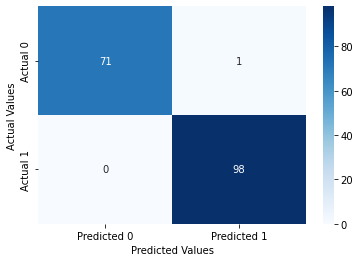

In [81]:
confusion_matrix_data(train, train.Classes, logit_model, 0.3)

Classification accuracy = 95.9%
Precision = 97.4%
TPR or Recall = 94.9%
FNR = 5.1%
FPR = 2.9%


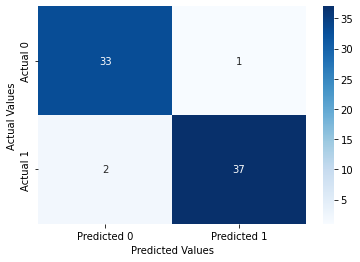

In [82]:
confusion_matrix_data(test, test.Classes, logit_model, 0.3)

# Model Evaluation (Abenezer)

- ROC-AUC
- Confusion Matrix
- Precision, recall, that sort of thing
- 